In [1]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import argparse
sns.set_theme()

from utils import (
    # save_checkpoint, 
    # visualize, 
    load_data, 
    # balance,
    # similarity_matrix
)

In [2]:
results = pd.DataFrame()

for d in ['census_income', 'dutch_census', 'compas']:
    for r in range(1,11):
        for g in [0.0, 1.0, 10.0, 100.0]:
            checkpoints = torch.load(f'resulting_clusterings/{d}/last_dec_nclusters2_g{g}_id{r}.pt', map_location=torch.device('cpu'))
            iters = checkpoints['iterations']
            acc = checkpoints['acc_ter']
            loss = checkpoints['loss_iterations']
            balance_cluster1 = np.array(checkpoints['balance_iterations'])[:,0]
            balance_cluster2 = np.array(checkpoints['balance_iterations'])[:,1]
            balance_cluster_min = np.array(checkpoints['balance_iterations']).min(axis=1)
            balance_cluster_mean = np.array(checkpoints['balance_iterations']).mean(axis=1)
            nmi = checkpoints['nmi_ter']

            new_results = pd.DataFrame({'datasets': [d]*len(checkpoints['loss_iterations']),
                                        'gamma': [g]*len(checkpoints['loss_iterations']),
                                        'iteration': iters,
                                        'loss': loss,
                                        'acc': acc,
                                        'balance_cluster1': balance_cluster1,
                                        'balance_cluster2': balance_cluster2,
                                        'balance_cluster_min': balance_cluster_min,
                                        'balance_cluster_mean': balance_cluster_mean,
                                        'nmi': nmi})
            results = pd.concat((results, new_results), axis=0, ignore_index=True)
            

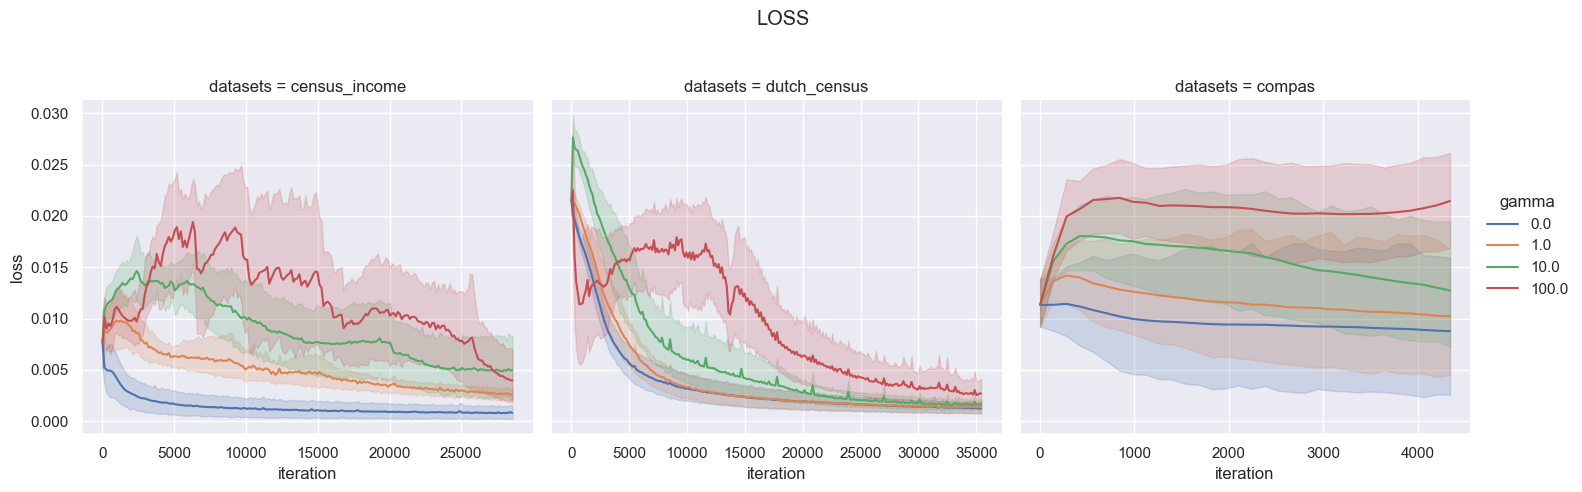

In [8]:
rel = sns.relplot(data=results, x='iteration', y='loss', hue='gamma', col='datasets', kind='line', facet_kws={'sharey': True, 'sharex': False}, palette=sns.color_palette()[:4])
rel.fig.subplots_adjust(top=.8)
rel.fig.suptitle('LOSS')
plt.show()

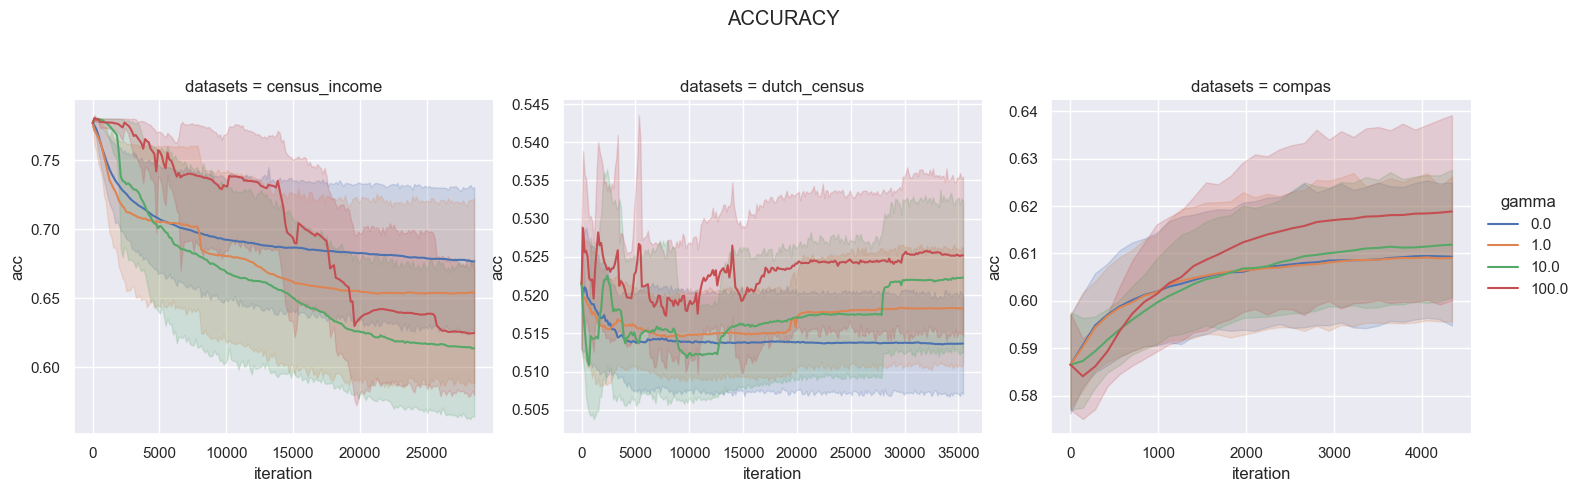

In [10]:
rel = sns.relplot(data=results, x='iteration', y='acc', hue='gamma', col='datasets', kind='line', facet_kws={'sharey': False, 'sharex': False}, palette=sns.color_palette()[:4])
rel.fig.subplots_adjust(top=.8)
rel.fig.suptitle('ACCURACY')
plt.show()

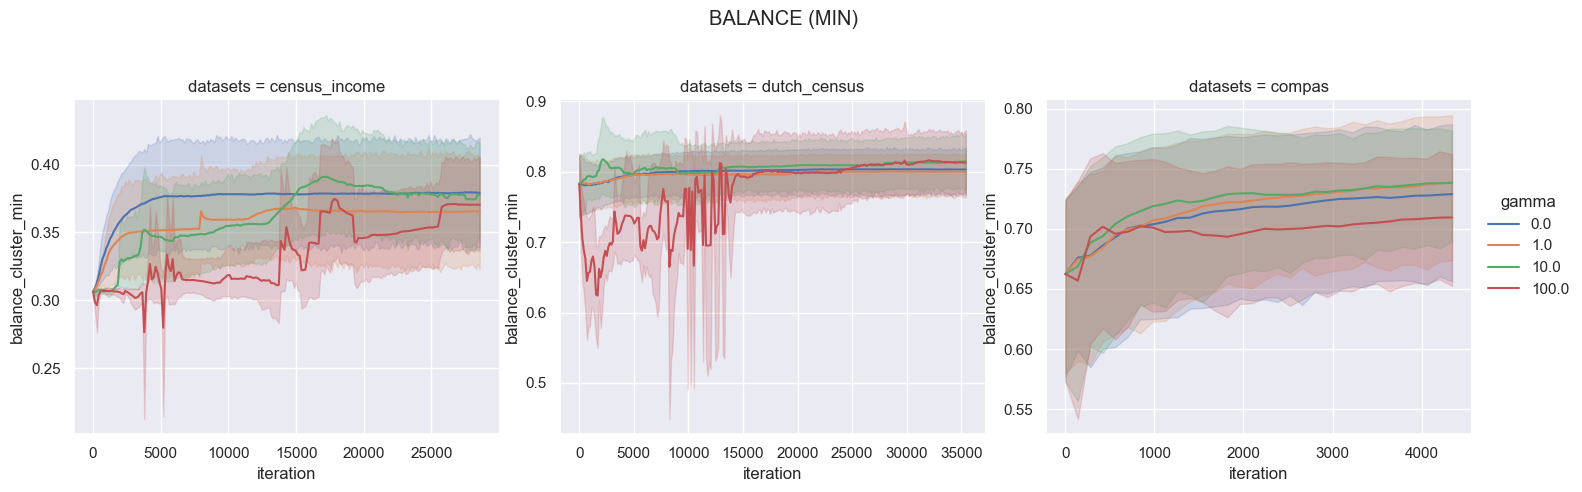

In [13]:
rel = sns.relplot(data=results, x='iteration', y='balance_cluster_min', hue='gamma', col='datasets', kind='line', facet_kws={'sharey': False, 'sharex': False}, palette=sns.color_palette()[:4])
rel.fig.subplots_adjust(top=.8)
rel.fig.suptitle('BALANCE (MIN)')
plt.show()

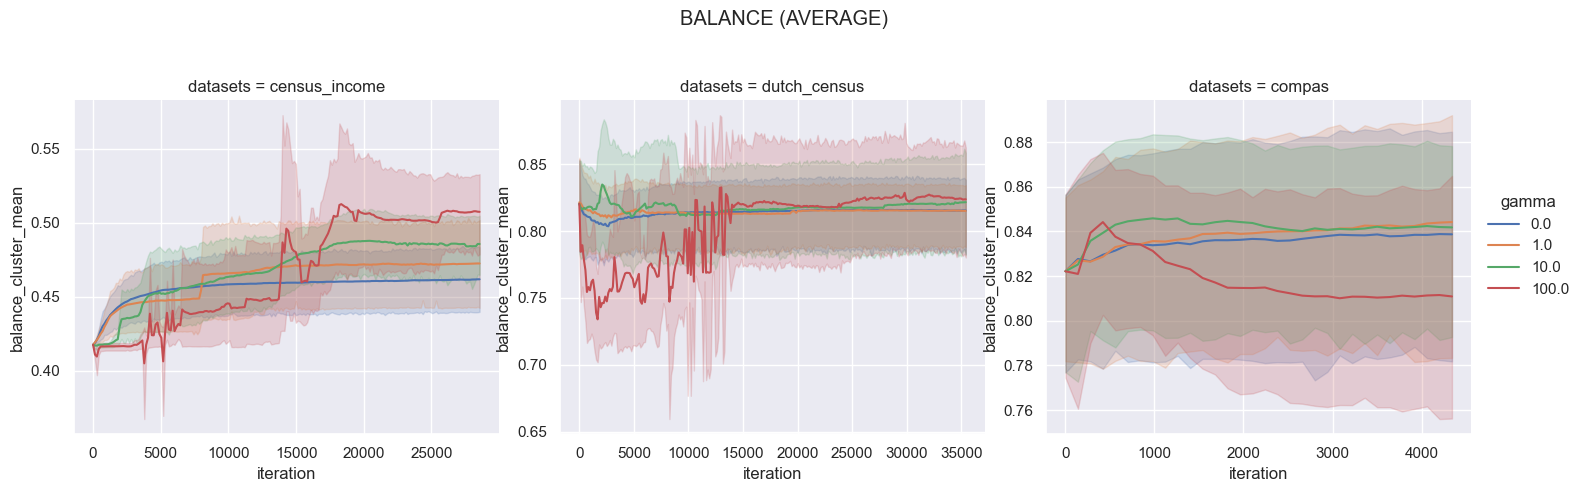

In [12]:
rel = sns.relplot(data=results, x='iteration', y='balance_cluster_mean', hue='gamma', col='datasets', kind='line', facet_kws={'sharey': False, 'sharex': False}, palette=sns.color_palette()[:4])
rel.fig.subplots_adjust(top=.8)
rel.fig.suptitle('BALANCE (AVERAGE)')
plt.show()

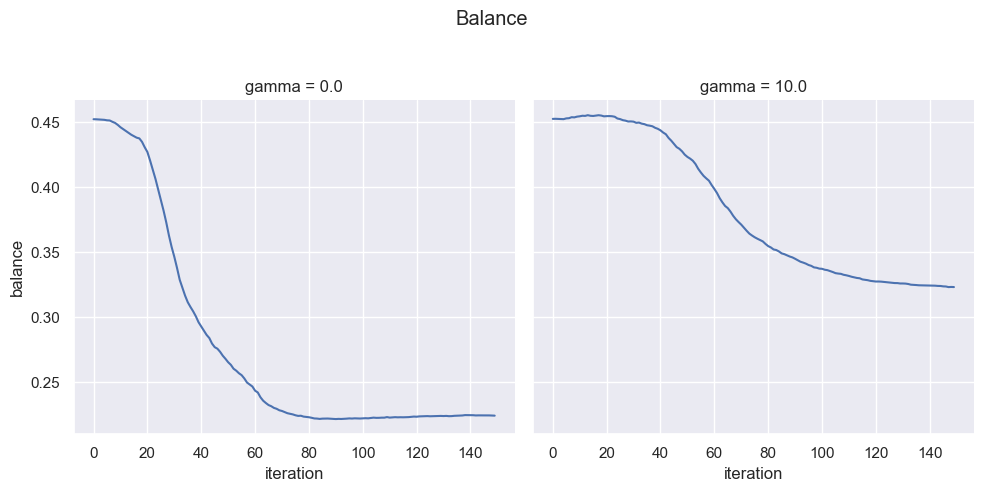

In [75]:
rel = sns.relplot(data=results_last, x='iteration', y='balance', col='gamma', kind='line')
rel.fig.subplots_adjust(top=.8)
rel.fig.suptitle('Balance')
plt.show()